#### Nombre: Moises Quiroz Diaz
#### G:3

### Solución Desafío - Naive Bayes

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.

### Descripción

* En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. 
* Cada uno de los csv se encuentra en la carpeta dump dentro del proyecto. Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
* En base a esta información, se les pide un modelo generativo que pueda predecir el género de una canción a patir de la letra de una canción.
* Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad trabajaremos con un Multinomial Naive Bayes.

### Ejercicio 1: Preparar el ambiente de trabajo

* Importe los módulos numpy , pandas , matplotlib , seaborn , glob y os siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump.
* Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormente genere un objeto pd.DataFrame que contenga todos los csv.
* Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [2]:
plt.style.use('seaborn')

In [3]:
rutas = glob.glob(os.getcwd()+'/dump/*.csv')
datas = []
for ruta in rutas:
    df = pd.read_csv(ruta).drop(columns='Unnamed: 0')
    datas.append(df)

In [4]:
df = pd.concat(datas)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9489 entries, 0 to 129
Data columns (total 4 columns):
0    9489 non-null object
1    9489 non-null object
2    9489 non-null object
3    9489 non-null object
dtypes: object(4)
memory usage: 370.7+ KB


In [5]:
df.sample()

,0,1,2,3
398,Bruce Springsteen,rock,Pilgrim In The Temple Of Love,"It was Christmas Eve, I was standin' in the pa..."


In [6]:
df.columns=['Artista','Genero','Cancion','Letra']
df.head()

,Artista,Genero,Cancion,Letra
0,Public Enemy,hiphop,You're Gonna Get Yours,"(Flavor Flav) \n Oh-oh Chuck, they out to get ..."
1,Public Enemy,hiphop,Sophisticated Bitch,"That woman in the corner, cold playin' the rol..."
2,Public Enemy,hiphop,Miuzi Weighs A Ton,"Yo Chuck, run a power move on them \n (Yeah) \..."
3,Public Enemy,hiphop,Timebomb,"(Intro - Flavor Flav) \n Hey, Chuck, we got so..."
4,Public Enemy,hiphop,Too Much Posse,(Intro - Flavor Flav) \n What do you got to sa...


### Ejercicio 2: Descripción de los datos
* Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información:
    * La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.
    * La cantidad de canciones registradas en cada género, ordenados de mayor a menor.
* Comente sobre las principales tendencias.

<BarContainer object of 61 artists>

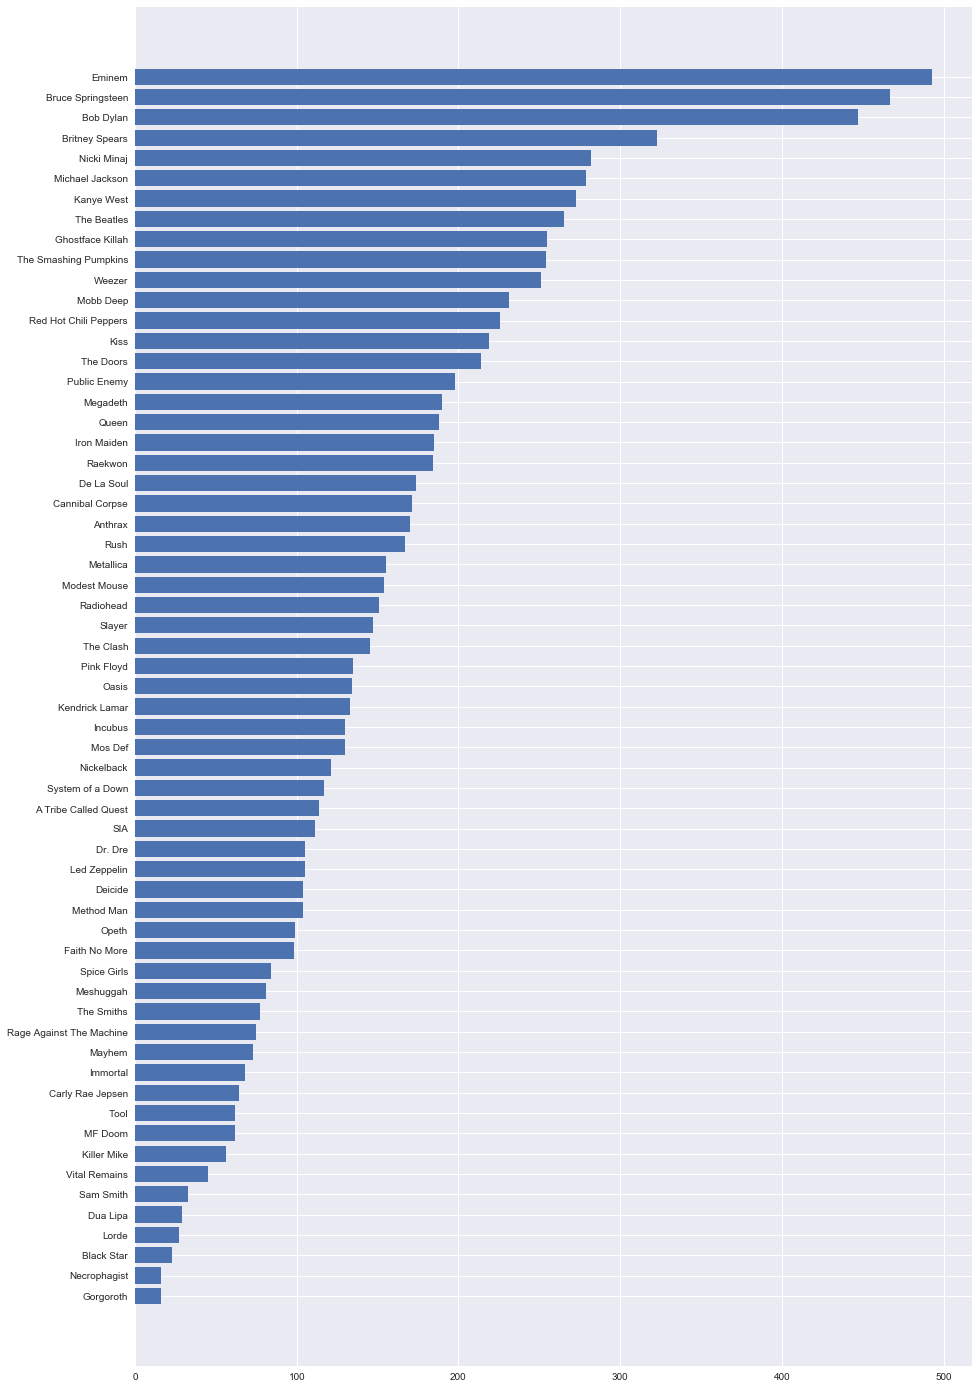

In [7]:
plt.figure(figsize=(15,25))
plt.barh(y=df.Artista.value_counts(ascending=True).index,width=df.Artista.value_counts(ascending=True))

<BarContainer object of 4 artists>

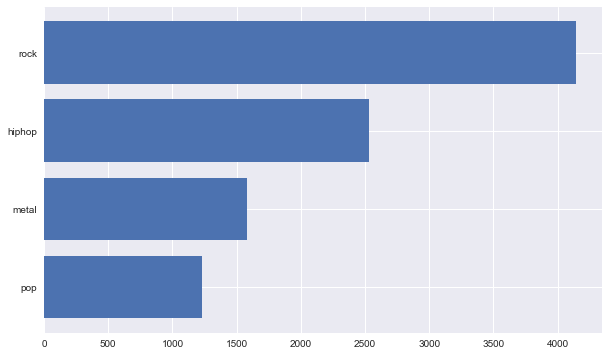

In [8]:
plt.figure(figsize=(10,6))
plt.barh(y=df.Genero.value_counts(ascending=True).index,width=df.Genero.value_counts(ascending=True))

principalmente se observa que hay cantantes que superan por mucho a sus compañeros en cantidad de canciones y que la mayor parte de las canciones son rock

### Ejercicio 3: Matriz de ocurrencias

* Digresión: Tokenización de Textos
    * Para poder trabajar con textos, debemos pasarlos a una matriz dispersa, donde cada fila representará una entrada (en este caso, una canción), y cada columna representará una palabra (token). Este es el proceso de tokenización: Identificar la ocurrencia de una palabra específica dentro de un conjunto de textos (corpus). El tokenizador más simple sklearn.feature_extraction.text.CountVectorizer genera una colección de textos a una matriz que representa la frecuencia dentro del texto de una palabra específica. El tokenizador funciona de la siguiente manera:
    
```python

from sklearn.feature_extraction.text import CountVectorizer
# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words='english')
# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(lista_de_textos)
# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)
```
    
    
* Importe la clase CountVectorizer dentro de los módulos feature_extraction.text de la librería sklearn . Lea la documentación asociada a ésta. ¿Cuál es el objetivo de esta clase?
* Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.
* Genere una función que replique el procedimiento para cada uno de los géneros.
* Comente sobre las principales características de cada género en cuanto a sus palabras.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words='english',max_features=100)

#### Para toda la base de datos

In [11]:
count_vectorizer_fit = count_vectorizer.fit_transform(df.Letra)
# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

In [12]:
agrupados = dict(zip(words,words_freq))
agrupados = dict(sorted(agrupados.items(), key = lambda x : x[1]))

<BarContainer object of 100 artists>

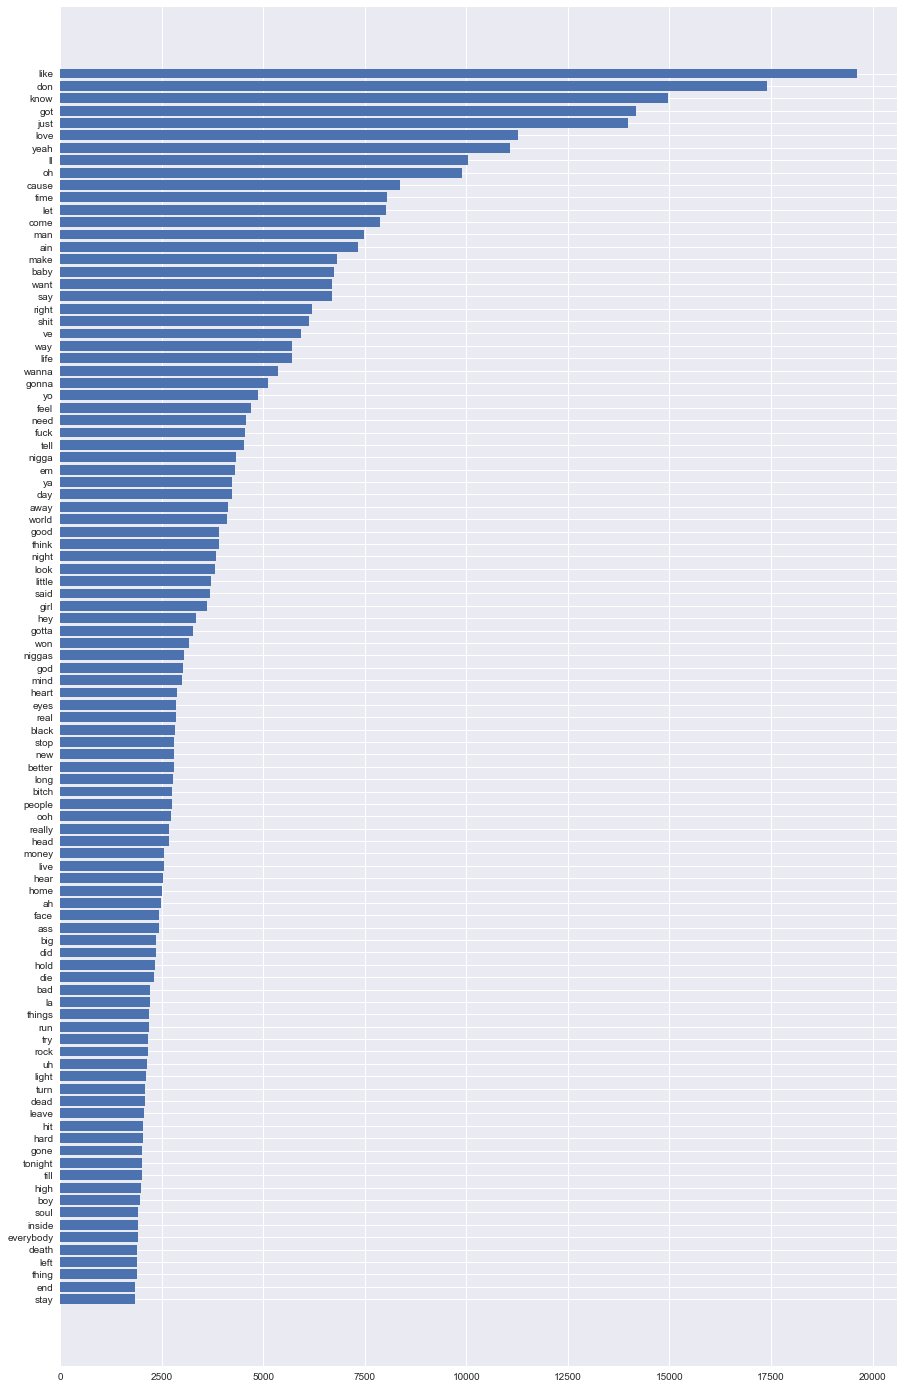

In [13]:
plt.figure(figsize=(15,25))
plt.barh(y=list(agrupados.keys()),width=list(agrupados.values()))

#### Por genero

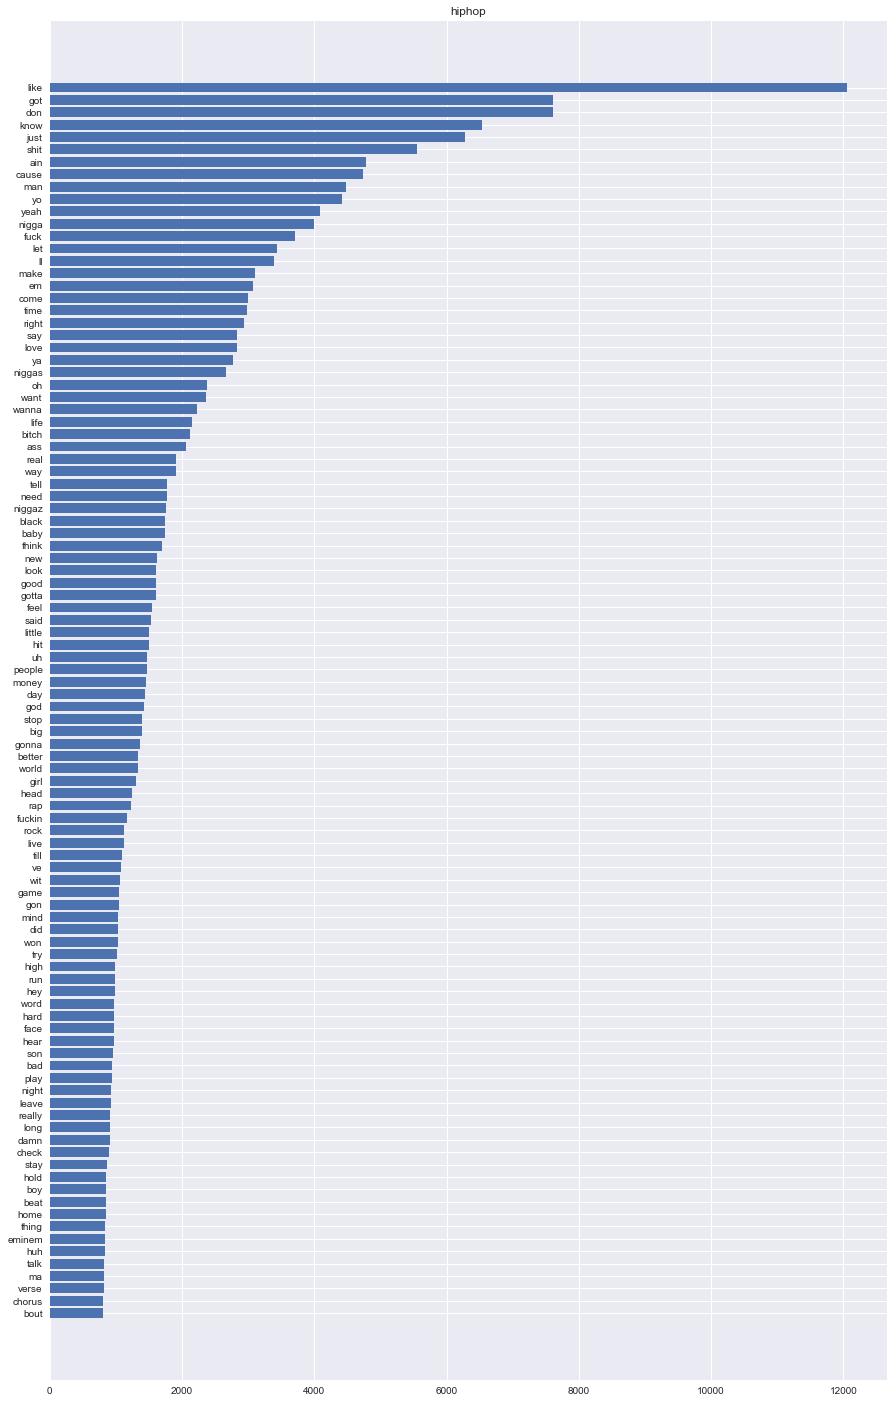

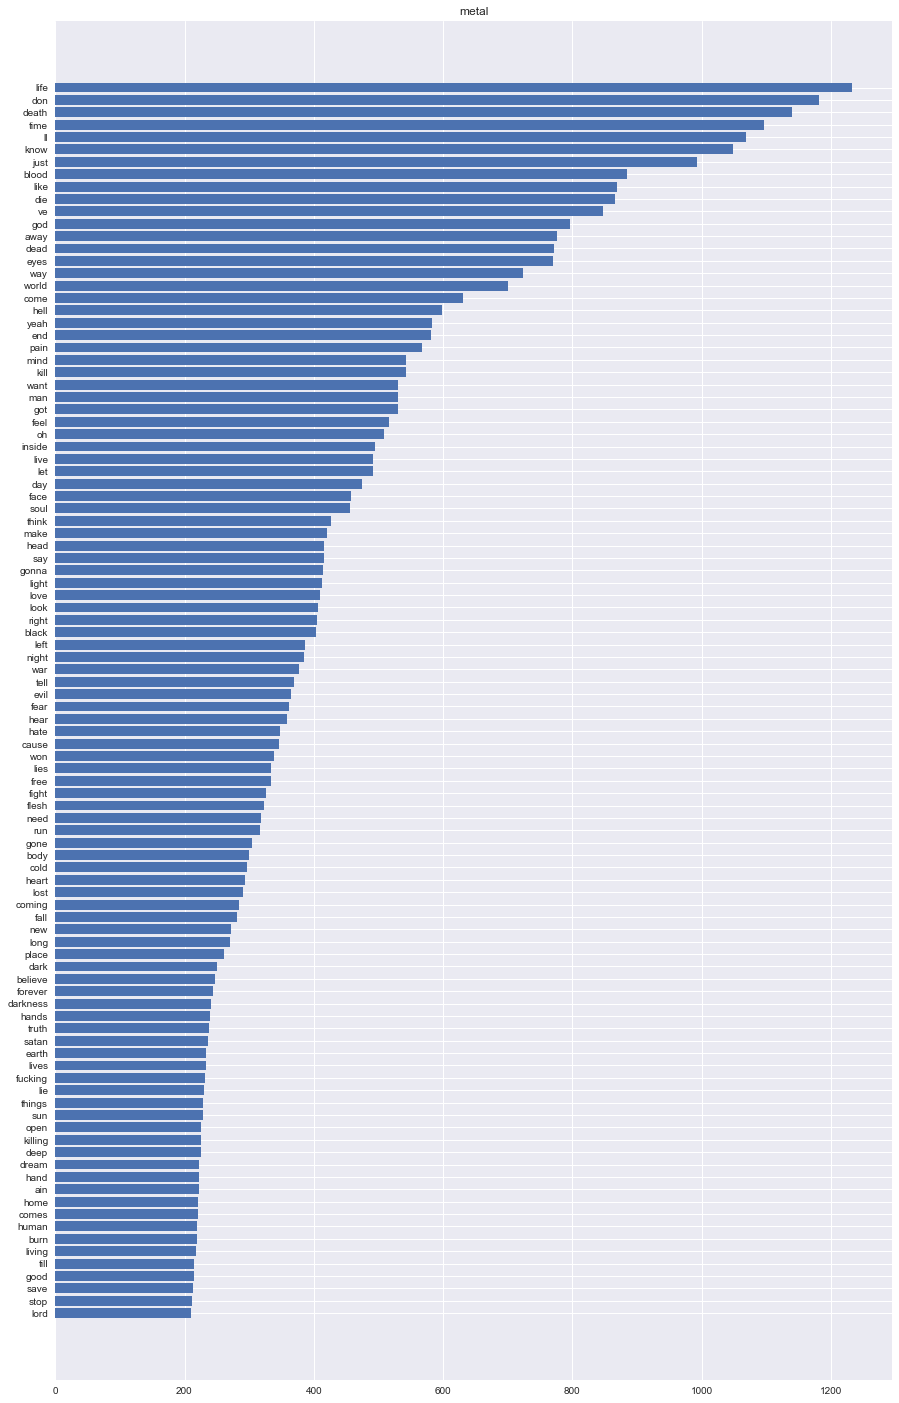

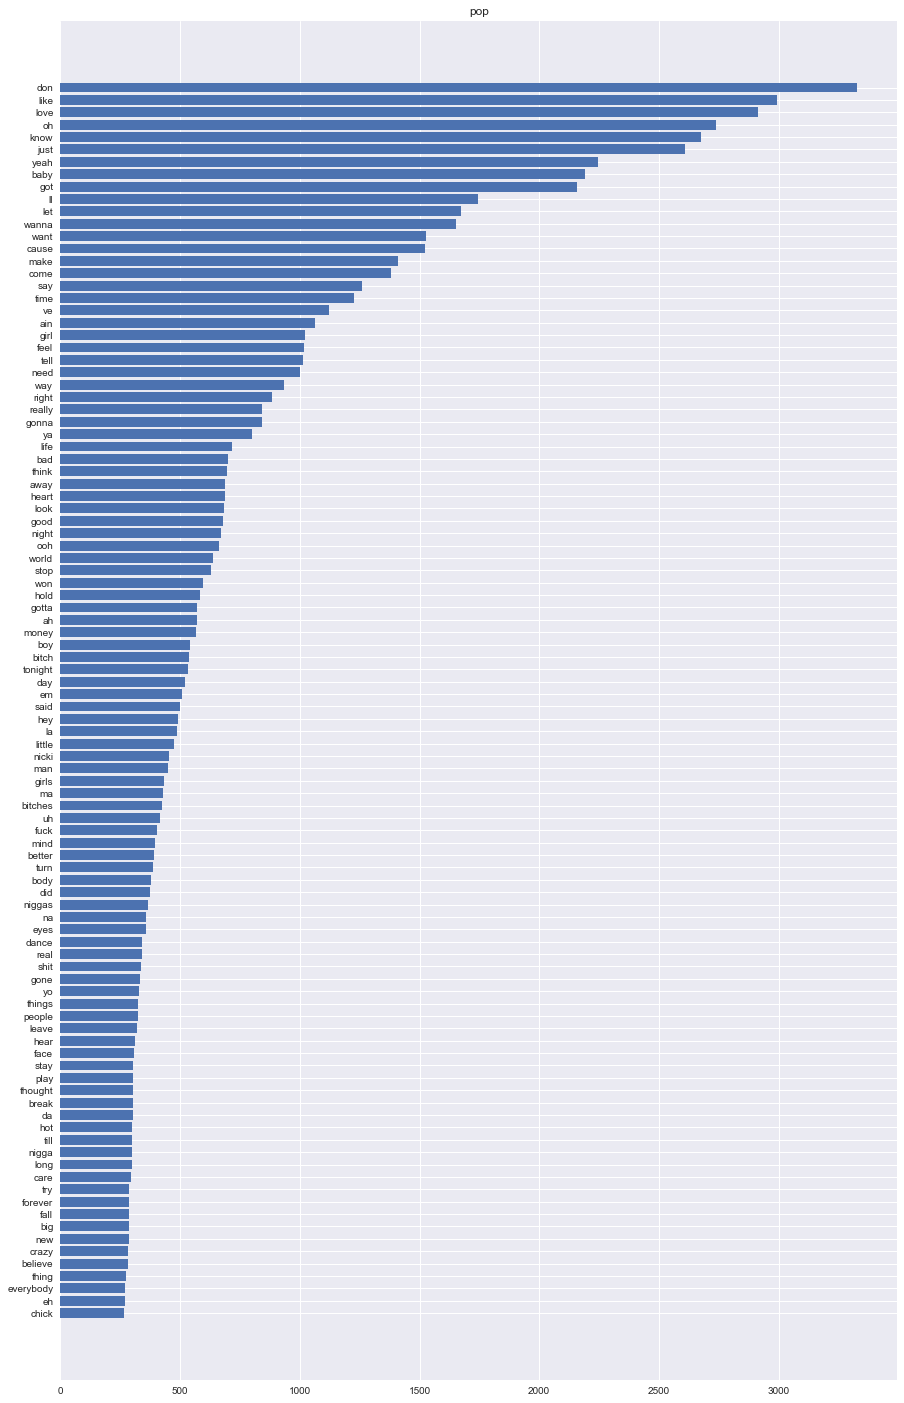

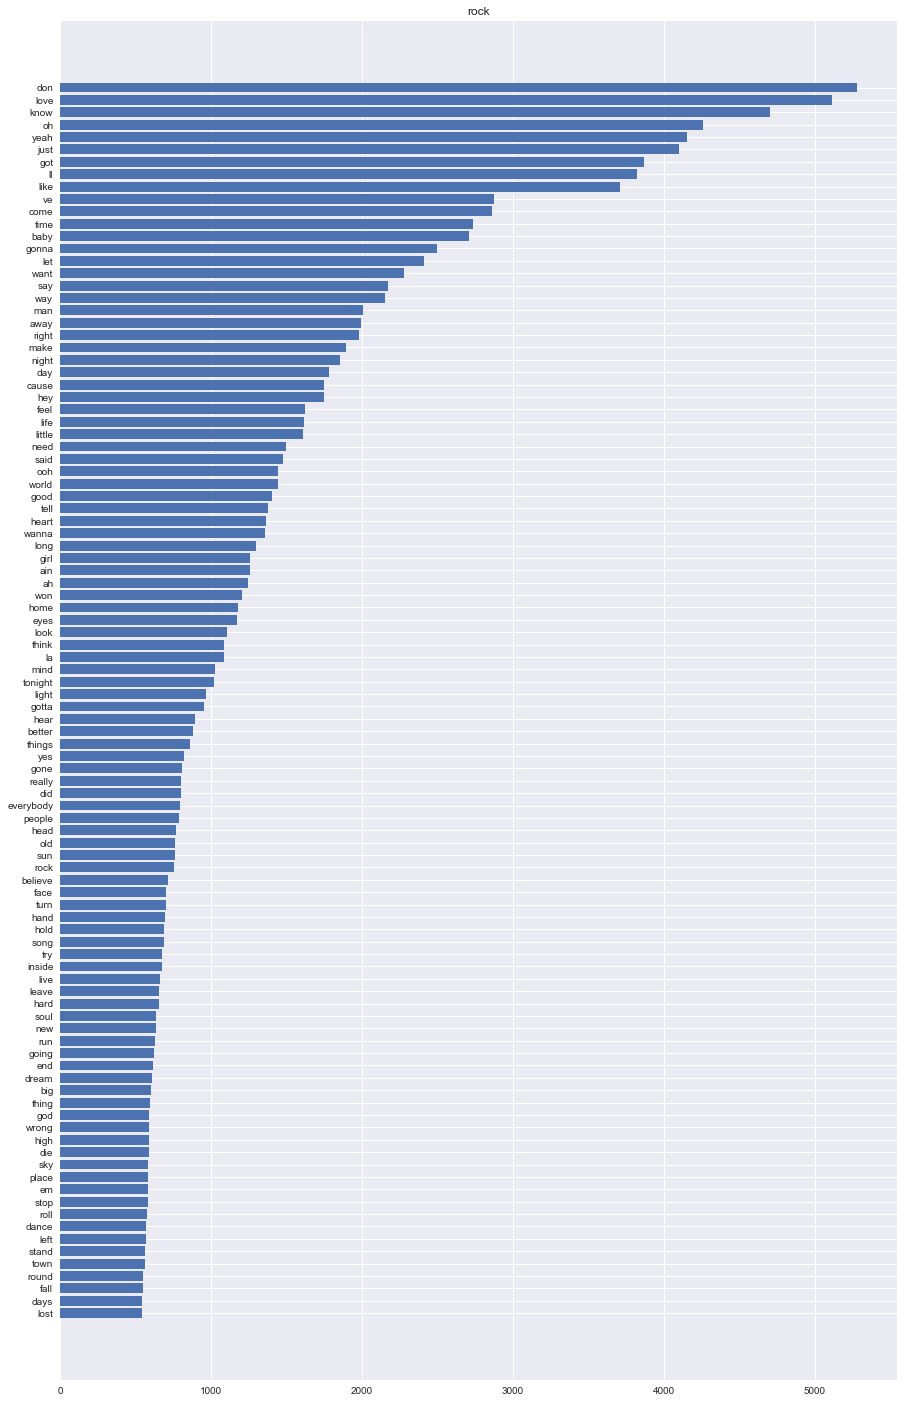

In [14]:
def generos(df,max_features=100):
    """Funcion que genera el grafico para todos los generos del df"""
    count_vectorizer=CountVectorizer(stop_words='english',max_features=max_features)
    for i in df.Genero.unique():
        count_vectorizer_fit = count_vectorizer.fit_transform(df[df['Genero']==i].Letra)
        # Extraemos tokens (palabras)
        words = count_vectorizer.get_feature_names()
        # extraemos frecuencia
        words_freq = count_vectorizer_fit.toarray().sum(axis=0)
        agrupados = dict(zip(words,words_freq))
        agrupados = dict(sorted(agrupados.items(), key = lambda x : x[1]))
        plt.figure(figsize=(15,25))
        plt.barh(y=list(agrupados.keys()),width=list(agrupados.values()))
        plt.title(i)
        plt.show()
    
generos(df)

Se analizan cuales son las palabras mas repetidas por genero en comparacion

In [15]:
dic = {}
for i in df.Genero.unique():
    count_vectorizer_fit = count_vectorizer.fit_transform(df[df['Genero']==i].Letra)
    # Extraemos tokens (palabras)
    words = count_vectorizer.get_feature_names()
    # extraemos frecuencia
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    agrupados = dict(zip(words,words_freq))
    agrupados = dict(sorted(agrupados.items(), key = lambda x : x[1]))
    mas_repetidas = list(agrupados.keys())[-6:]
    mas_repetidas.reverse()
    dic[i]= mas_repetidas
comp = pd.DataFrame(dic)
comp

,hiphop,metal,pop,rock
0,like,life,don,don
1,got,don,like,love
2,don,death,love,know
3,know,time,oh,oh
4,just,ll,know,yeah
5,shit,know,just,just


Se observa que las palabras mas repetidas en cada genero, son palabras simples

### Ejercicio 4: Entrenamiento del Modelo
* Digresión: sklearn Pipelines
    * La clase Pipeline del módulo sklearn.pipeline permite concatenar múltiples pasos de procesamiento y preprocesamiento en un estimador generado por algún método de scikitlearn . En sí, la clase cuenta con los métodos clásicos fit , predict y score y presenta un comportamiento idéntico a los demás objetos de scikit-learn . Uno de los usos más comunes es para concatenar pasos de preprocesamiento con un modelo.
    
* Componentes de un Pipeline
   * Imaginemos que deseamos implementar el siguiente modelo. Considerando un conjunto de datos, deseo Estandarlizarlo, posteriormente extraer sus principales componentes y finalmente aplicar un modelo de regresión lineal. Este flujo se puede reexpresar como:
       
```python
pipeline_model = Pipeline([('scale', StandardScaler()),
                            ('pca', RandomizedPCA(n_components=3)),
                            ('model', LinearRegression())])
```
Algunos de los elementos a considerar:
1. Cada paso se considera como una tupla, donde se declara el nombre del paso y la función
a implementar. En este caso, nuestro primer paso es estandarizar la matriz, por lo que
asociamos el método StandardScaler con el string scale .
2. Todos los pasos declarados se incorporan en una lista, donde el orden de ingreso
representa el orden de ejecución.
Posteriormente el objeto creado puede utilizarse con los siguientes métodos

```python
pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(y_test)
```

* Importe MultinomialNB , train_test_split , Pipeline , confusion_matrix y classification_report.
* Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria.
* Monte el modelo dentro de un Pipeline , donde el primer paso es implementar CountVectorizer y el segundo sea ejecutar el clasificador MultinomialNB.
* A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones correspondientes?

```python
['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris -Move B*tch
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates' # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" #Banks -Drowning
]
```

* Genere una predicción implementando la muestra de validación y contraste las predicciones del modelo con las etiquetas verdaderas. Reporte las principales métricas.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
X_train,X_test,y_train,y_test = train_test_split(df['Letra'],df['Genero'],test_size=.33,random_state=11238)

In [18]:
pipeline_model = Pipeline([('count', CountVectorizer(stop_words='english',max_features=100)),
                            ('model', MultinomialNB())])

In [19]:
pipeline_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('count',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=100, min_df=1, ngram_range=(1, 1),
                                 preprocessor=None, stop_words='english',
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [20]:
canciones = ['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris -Move B*tch
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates' # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" #Banks -Drowning
]

In [21]:
predic2 = pipeline_model.predict(canciones)
#Los agrupa de la siguiente manera
predic2

array(['rock', 'rock', 'hiphop', 'hiphop', 'rock'], dtype='<U6')

In [22]:
predic = pipeline_model.predict(X_test)
print(classification_report(y_test,predic))

              precision    recall  f1-score   support

      hiphop       0.79      0.79      0.79       858
       metal       0.56      0.74      0.64       527
         pop       0.36      0.34      0.35       390
        rock       0.72      0.65      0.68      1357

    accuracy                           0.67      3132
   macro avg       0.61      0.63      0.62      3132
weighted avg       0.67      0.67      0.66      3132



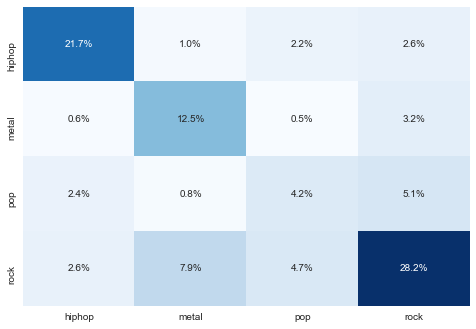

In [23]:
cnf = confusion_matrix(y_test,predic)/len(y_test)
target_label = ['hiphop','metal','pop','rock']
sns.heatmap(cnf,annot=True,fmt='.1%',cbar=False,cmap='Blues',
    xticklabels=target_label,yticklabels=target_label)

#### En general no se observa un buen rendimiento en el algoritmo clasificatorio, esto puede deberse a que existen muchas palabras similares entre generos, cosa que dificulta la distincion de clases

### Ejercicio 5: Mejora del Modelo
* Proponga una estrategia para mejorar el desempeño del modelo en la categoría con peores métricas.
* Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos datos suministrados.
* Comente sobre el desempeño general de éste.

Una estrategia puede consistir en aumentar el tamaño de la data con la que se trabaja, cosa que en general trae mejores resultados a un modelo predictivo

In [24]:
rutas = glob.glob(os.getcwd()+'/dump_plus_pop/*.csv')
datas = []
for ruta in rutas:
    df = pd.read_csv(ruta).drop(columns='Unnamed: 0')
    datas.append(df)
df = pd.concat(datas)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10804 entries, 0 to 129
Data columns (total 4 columns):
0    10804 non-null object
1    10804 non-null object
2    10804 non-null object
3    10804 non-null object
dtypes: object(4)
memory usage: 422.0+ KB


In [25]:
df.columns=['Artista','Genero','Cancion','Letra']
df.head()

,Artista,Genero,Cancion,Letra
0,Public Enemy,hiphop,You're Gonna Get Yours,"(Flavor Flav) \n Oh-oh Chuck, they out to get ..."
1,Public Enemy,hiphop,Sophisticated Bitch,"That woman in the corner, cold playin' the rol..."
2,Public Enemy,hiphop,Miuzi Weighs A Ton,"Yo Chuck, run a power move on them \n (Yeah) \..."
3,Public Enemy,hiphop,Timebomb,"(Intro - Flavor Flav) \n Hey, Chuck, we got so..."
4,Public Enemy,hiphop,Too Much Posse,(Intro - Flavor Flav) \n What do you got to sa...


<BarContainer object of 72 artists>

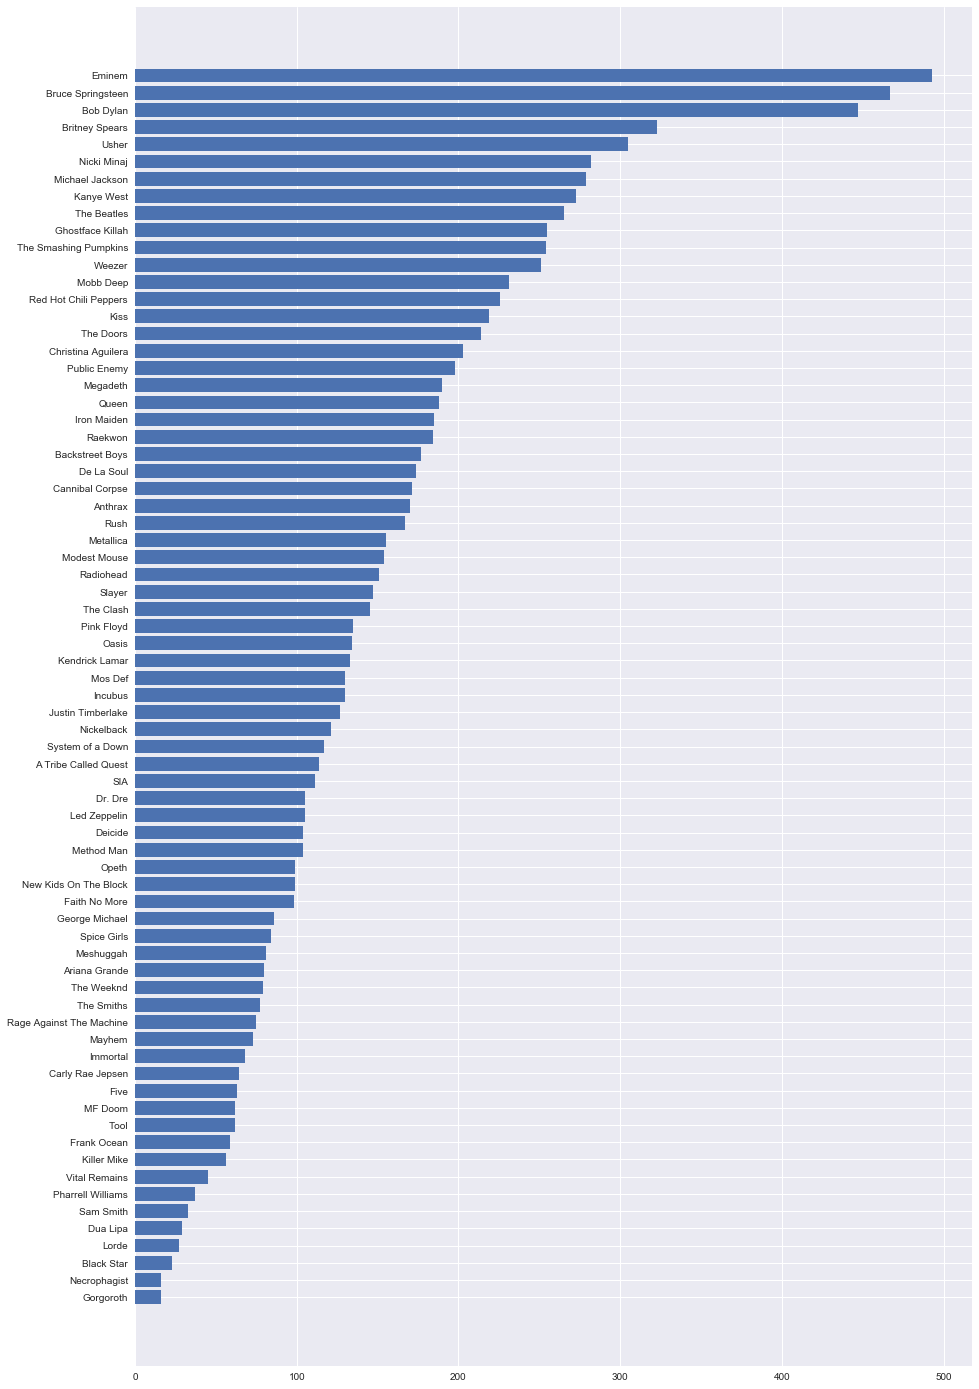

In [26]:
plt.figure(figsize=(15,25))
plt.barh(y=df.Artista.value_counts(ascending=True).index,width=df.Artista.value_counts(ascending=True))

<BarContainer object of 4 artists>

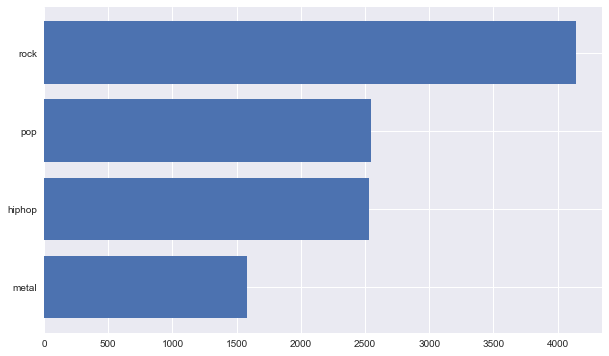

In [27]:
plt.figure(figsize=(10,6))
plt.barh(y=df.Genero.value_counts(ascending=True).index,width=df.Genero.value_counts(ascending=True))

Aqui se puede observar que la distribucion de clases es mas pareja que como en el caso original

In [28]:
X_train,X_test,y_train,y_test = train_test_split(df['Letra'],df['Genero'],test_size=.33,random_state=11238)
pipeline_model = Pipeline([('count', CountVectorizer(stop_words='english',max_features=100)),
                            ('model', MultinomialNB())])
pipeline_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('count',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=100, min_df=1, ngram_range=(1, 1),
                                 preprocessor=None, stop_words='english',
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [29]:
predic2 = pipeline_model.predict(X_test)
print(classification_report(y_test,predic2))

              precision    recall  f1-score   support

      hiphop       0.77      0.79      0.78       846
       metal       0.52      0.71      0.60       560
         pop       0.53      0.48      0.51       798
        rock       0.63      0.55      0.59      1362

    accuracy                           0.62      3566
   macro avg       0.61      0.63      0.62      3566
weighted avg       0.62      0.62      0.62      3566



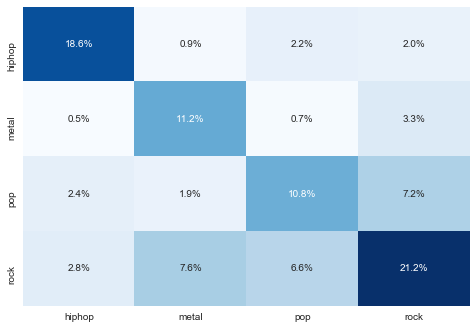

In [30]:
cnf2 = confusion_matrix(y_test,predic2)/len(y_test)
target_label = ['hiphop','metal','pop','rock']
sns.heatmap(cnf2,annot=True,fmt='.1%',cbar=False,cmap='Blues',
    xticklabels=target_label,yticklabels=target_label)

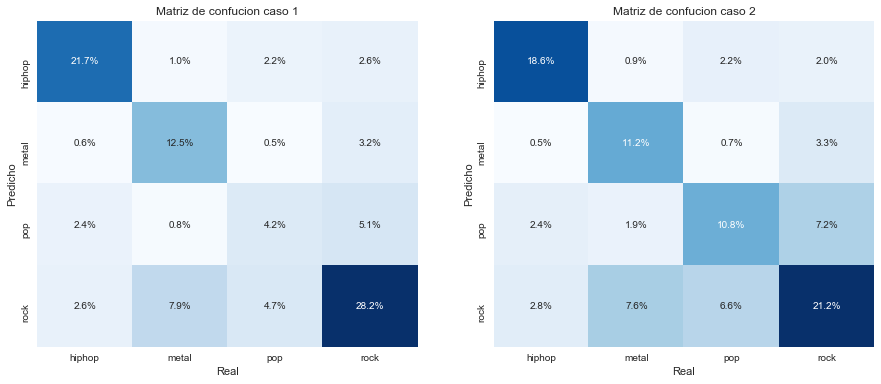

In [31]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.heatmap(cnf,annot=True,fmt='.1%',cbar=False,cmap='Blues',
    xticklabels=target_label,yticklabels=target_label)
plt.xlabel('Real')
plt.title('Matriz de confucion caso 1')
plt.ylabel('Predicho')

plt.subplot(1, 2, 2)
sns.heatmap(cnf2,annot=True,fmt='.1%',cbar=False,cmap='Blues',
    xticklabels=target_label,yticklabels=target_label)
plt.xlabel('Real')
plt.title('Matriz de confucion caso 2')
plt.ylabel('Predicho')
plt.show()

Lo que se puede rescatar del analisis de ambas matrices de confucion, es que si bien el accuracy disminuyo, se obsarva un recall mas parejo y en paralelo el caso de POP ahora es clasificado de mejor manera